# Part I - Communicate Data Findings, Ford GoBike dataset
## by Gabriel Wachira

### Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#preliminary">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

In this exploration, we will be working with the Ford GoBike dataset. The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, in February 2019. “Bike share is an innovative mode of transportation that allows users to make trips using publicly available bikes. It consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the service area. The bikes can be unlocked from one station and returned to any other station in the system, making bike share ideal for short, one-way trips. As seen [here](https://help.baywheels.com/hc/en-us/articles/360033794232-How-does-bike-share-work-#:~:text=Bike%20share%20is,one%2Dway%20trips).

A bicycle-sharing system is a shared transport service where bicycles are available for shared use by individuals for a short-term at low or zero cost.
The programs themselves include both docking and dockless systems, where docking systems allow users to borrow a bike from a dock, i.e., a technology-enabled bicycle rack and return at another node or dock within the system, — and dockless systems, which offer a node-free system relying on smart technology. In either format, the systems may incorporate smartphone web mapping to locate available bikes and docks. More [here](https://en.wikipedia.org/wiki/Bicycle-sharing_system#:~:text=A%20bicycle%2Dsharing,bikes%20and%20docks)

Ford GoBike was a regional public bicycle-sharing system in California's San Francisco Bay Area, that rebranded to [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels#:~:text=Bay%20Wheels%20is,Jose.%5B6%5D). It is operated by Motivate, in partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. 
The columns in this dataset are:

- **duration_sec** - how long the trip is in seconds
- **start_time** - when the trip starts
- **end_time** - when the trip ends
- **start_station_id** - the station unique id where the bike was picked from for the trip
- **start_station_name** - the name of the station where the bike was picked from for the trip
- **start_station_latitude** - latitude coordinates for the station the bike was picked from
- **start_station_longitude** - longitude coordinates for the station the bike was picked from
- **end_station_id** - the station unique id where the bike was dropped off after the trip
- **end_station_name** - the name of the station where the bike was dropped after the trip
- **end_station_latitude** - latitude coordinates for the station the bike was dropped off after the trip
- **end_station_longitude** - longitude coordinates for the station the bike was dropped off after the trip.
- **bike_id** - the unique identifier for the particular bike used in the trip
- **user_type** - whether the user is a customer or a subscriber ( “Subscriber” = Member or “Customer” = Casual)
- **member_birth_year** - the year the user was born
- **member_gender** - the gender which the user identifies with
- **bike_share_for_all_trip** - whether the user is subscribed to the state or federal assistance programs that target low income residents.



<a id='preliminary'></a>
## Preliminary Wrangling


In [1]:
# upgrade seaborn if we dont have the current version installed
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
import requests
import math

%matplotlib inline

In [3]:
# gather data
dataset_source = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
response = requests.get(dataset_source)

with open(dataset_source.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
# load dataset 
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv', parse_dates=True)

In [5]:
fordgobike.shape

(183412, 16)

In [6]:
fordgobike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [7]:
fordgobike.tail(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [8]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [9]:
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
# dropping rows with null values
fordgobike.dropna(inplace=True)

In [11]:
#confirm the drop
fordgobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
# are there duplicated entries?
fordgobike.duplicated().sum()

0

In [13]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


**Some questions we have about the dataset:** 

- When are most trips taken in terms of time of day, day of the week, or month of the year?

- How long does the average trip take?

- Does the above depend on if a user is a subscriber or customer?

- how long is a typical trip

- is there more usage for particular gender than others

- what is the range  of the ages and does it affect usage 

- are there specific times of the day that bikes are used most

- elevation vs usage by start latitude and longitude and stop...

- does user type predict how long the bike usage / trip will last

We seek to answer some of these questions below.

First, some more wrangling.

In [14]:
# format the member birth year from an float to integer
fordgobike['member_birth_year'] = fordgobike['member_birth_year'].apply(math.floor)

In [15]:
# change the datatype of various columns in the dataset
formats = [
    {'datetime64[ns]' : ['start_time', 'end_time', 'member_birth_year']}, 
    {'category' : ['member_gender', 'bike_share_for_all_trip', 'user_type']}
    ]

for item in formats:
    for key, values in item.items():
        for column in values:
            fordgobike[column] = fordgobike[column].astype(str).astype(key)

In [16]:
# introduce an age column with age when rider started their trip

yr = pd.Timedelta('365.2425 days') # days in Gregorian calendar year

fordgobike['age'] = (fordgobike['start_time']- fordgobike['member_birth_year'])/yr

In [17]:
# create a column for the duration in minutes for easier interpretation
fordgobike['duration_mins'] = ((fordgobike['end_time'] - fordgobike['start_time']).dt.seconds / 60).apply(math.floor)

In [18]:
fordgobike.age.describe()

count    174952.000000
mean         34.322895
std          10.118887
min          18.084930
25%          27.126157
50%          32.116602
75%          39.117552
max         141.151139
Name: age, dtype: float64

We observe that we have a few senior riders above 85 years, we may need to investigate that further on the accuracy, but for this analysis, we pick the age of 85 as the upper limit. Persons above 85 year olds represent about 2.62 percent of the population in San Francisco County, California as reported in the U.S. Census Bureau (2021). Sex by Age American Community Survey 1-year estimates. Retrieved from [here](https://censusreporter.org/profiles/05000US06075-san-francisco-county-ca/) and San Francisco County, CA Census data:ACS 2021 1-year [data source](https://censusreporter.org/data/table/?table=B01001&geo_ids=05000US06075&primary_geo_id=05000US06075#valueType|estimate) 

In [19]:
#how many entries have the age above 85?
len(fordgobike[fordgobike.age>85])

189

We can drop the entries with the upper age as there are only a few in our dataset.

In [20]:
# filter out entries with age above 85
fordgobike= fordgobike[fordgobike.age<=85]

In [21]:
# confirm the drop 
len(fordgobike[fordgobike.age>85])

0

In [22]:
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_mins
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984-01-01,Male,No,35.162202,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972-01-01,Male,No,47.161842,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989-01-01,Other,No,30.160089,608
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974-01-01,Male,Yes,45.161765,26
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959-01-01,Male,No,60.162750,29


In [23]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174763 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174763 non-null int64
start_time                 174763 non-null datetime64[ns]
end_time                   174763 non-null datetime64[ns]
start_station_id           174763 non-null float64
start_station_name         174763 non-null object
start_station_latitude     174763 non-null float64
start_station_longitude    174763 non-null float64
end_station_id             174763 non-null float64
end_station_name           174763 non-null object
end_station_latitude       174763 non-null float64
end_station_longitude      174763 non-null float64
bike_id                    174763 non-null int64
user_type                  174763 non-null category
member_birth_year          174763 non-null datetime64[ns]
member_gender              174763 non-null category
bike_share_for_all_trip    174763 non-null category
age                        174763 non-null float64
dura

### What is the structure of your dataset?

> We remain with 174,763 entries after our preliminary wrangling and 18 columns

### What is/are the main feature(s) of interest in your dataset?

> I want to find out what determines/ predicts the likelyhood of a trip occuring.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think trip duration, start time and end time are most likely to be the key features of interest.

<a id='univariate'></a>
## Univariate Exploration

#### Length of a trip

We begin our analysis by asking, how long does a typical trip take?

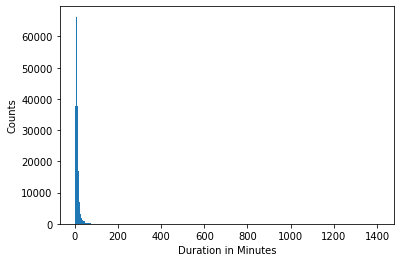

In [24]:
# how long is a typical trip?
# we plot a histogram to investigate the distribution
binsize = 5 # 5-minute tranches
bins = np.arange(0, fordgobike.duration_mins.max()+binsize, binsize)
plt.hist(data=fordgobike, x='duration_mins', bins=bins, )
plt.xlabel('Duration in Minutes')
plt.ylabel('Counts');

We observe a higly skewed distribution with most of the trips lasting between 0 and 100 minutes, while a few others going up to 1400 minutes

In [25]:
fordgobike.duration_mins.describe()

count    174763.000000
mean         11.246494
std          27.384836
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_mins, dtype: float64

we observe that majority of the trips are between 1 minute and 13 minutes but there is a long tail from 13 to 1409 minutes. Lets plot on a log scale and observe

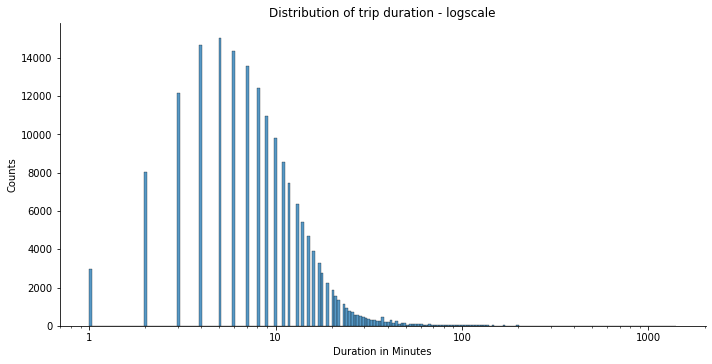

In [26]:
# x-axis on a log scale
sb.displot(data=fordgobike, x='duration_mins', height=5, aspect=2, log_scale=True)
plt.xticks(ticks=[1,10,100,1000], labels=[1,10,100,1000])
plt.ylabel('Counts')
plt.xlabel('Duration in Minutes')
plt.title('Distribution of trip duration - logscale');

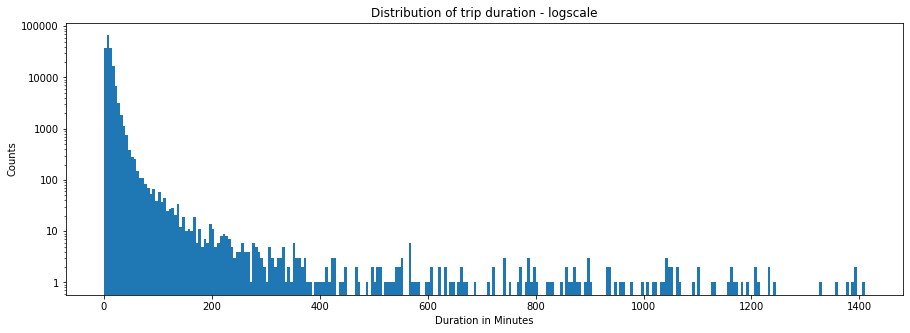

In [27]:
# y-axis on a log scale 
binsize = 5
bins = np.arange(0, fordgobike.duration_mins.max()+binsize, binsize)

plt.figure(figsize=(15,5))
plt.hist(data=fordgobike, x='duration_mins', bins=bins, log=True,)
plt.yticks(ticks=[1,10,100,1000,10000,100000], labels=[1,10,100,1000,10000,100000])
plt.ylabel('Counts')
plt.xlabel('Duration in Minutes')
plt.title('Distribution of trip duration - logscale');

Let's find out how the tail data distributed.

We plot the 100-1410 interval.

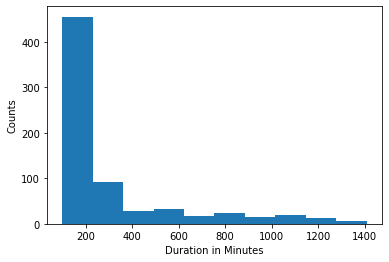

In [28]:
# 100-1410 interval (tail)
tail = fordgobike[fordgobike.duration_mins.between(100,1410)]
plt.hist(data=tail, x='duration_mins', )
plt.xlabel('Duration in Minutes')
plt.ylabel('Counts');

In [29]:
# number of entries in the tail
len(fordgobike[fordgobike.duration_mins.between(100,1410)])

703

Since most of the trips are between 0 and 100 minutes, we plot this interval, ignoring the extreme edge values:

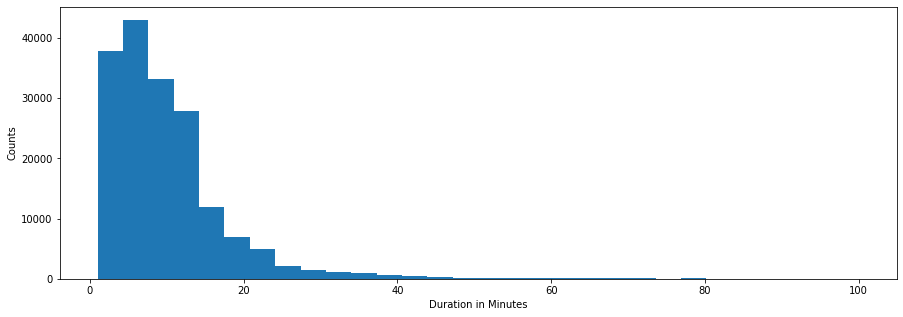

In [30]:
# 0-100 minutes interval trips 
plt.figure(figsize=(15,5))
plt.hist(data=fordgobike[fordgobike.duration_mins.between(0,100)], x='duration_mins', bins=30)
plt.xlabel('Duration in Minutes')
plt.ylabel('Counts');

We still observe a highly skewed dataset with most of the trips taking between a minute and 30 minutes

How does this interval compare on a logscale?

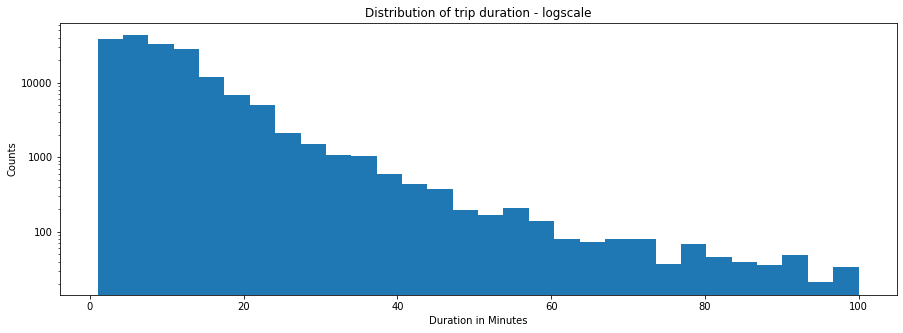

In [31]:
# plotting 0-100 interval on a logscale - y-axis logscale 
plt.figure(figsize=(15,5))
plt.hist(data=fordgobike[fordgobike.duration_mins.between(0,100)], x='duration_mins', bins=30, log=True,)
plt.yticks(ticks=[100,1000,10000,], labels=[100,1000,10000,])
plt.ylabel('Counts')
plt.xlabel('Duration in Minutes')
plt.title('Distribution of trip duration - logscale');

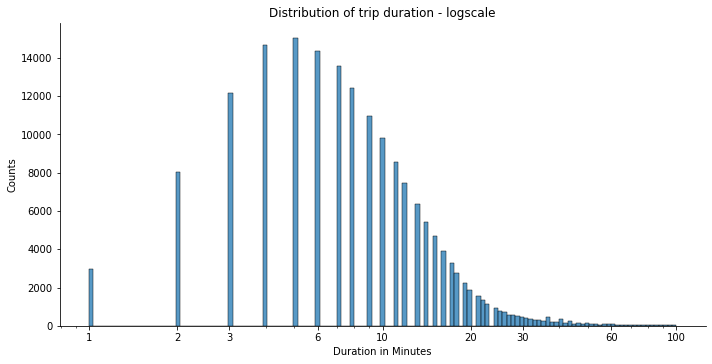

In [32]:
# plotting 0-100 interval on a logscale - x-axis logscale 
sb.displot(data=fordgobike[fordgobike.duration_mins.between(0,100)], x='duration_mins', height=5, aspect=2, log_scale=True)
plt.xticks(ticks=[1,2,3,6,10,20,30,60,100], labels=[1,2,3,6,10,20,30,60,100])
plt.ylabel('Counts')
plt.xlabel('Duration in Minutes')
plt.title('Distribution of trip duration - logscale');

There is skew but we observe a smooth descend.

We shall work with the data in this interval, filtering out the extreme values.

In [33]:
# filter the fordgobike dataset retaining only the interval between 0 and 100 minutes
fordgobike = fordgobike[fordgobike.duration_mins.between(0,100)]

Next, we go look into individual variables.

#### Characteristics of riders

##### Subscription: Subscribers and Customers

We find out the proportion of users by subscriber versus customer.

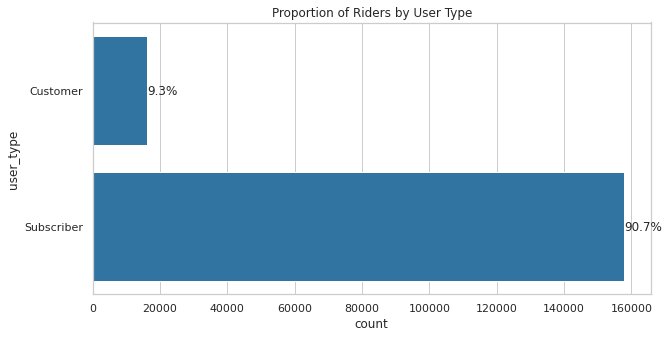

In [34]:
# distribution by user type in the dataset 
sb.set(style='whitegrid', palette=None, rc={'figure.figsize':(10,5)})
plots = sb.countplot(data=fordgobike, y='user_type', color=sb.color_palette()[0],)

# annotate the bars
freq = fordgobike.user_type.value_counts()
total_users = fordgobike.user_type.value_counts().sum()

for item in range(freq.shape[0]):
    count = freq[item]
    string = f'{100*count/total_users:.1f}%'
    plt.text(count+1, item, string, va='center')
    
plt.title('Proportion of Riders by User Type');

We observe that a large majority are subscribers at more than 90 percent

##### Distribution by gender

Then we find out how the users are distributed by gender.

Text(0.5, 1.0, 'Proportion of Riders by Gender')

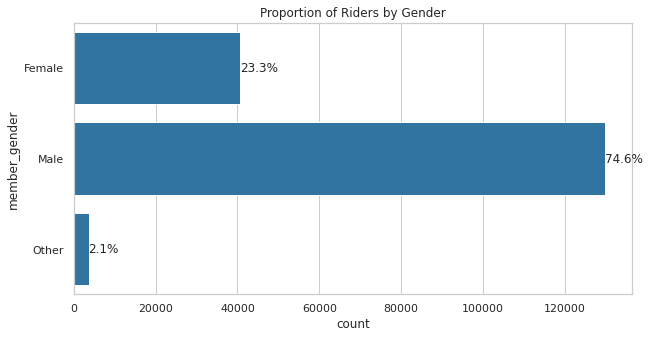

In [35]:
# usage by gender 
sb.set(style='whitegrid', palette=None, rc={'figure.figsize':(10,5)})
sb.countplot(data=fordgobike, y='member_gender', color=sb.color_palette()[0])

# annotate the bars
freq = fordgobike.member_gender.value_counts()
total_gender = fordgobike.member_gender.value_counts().sum()

for item in range(freq.shape[0]):
    count = freq[item]
    string = f'{100*count/total_gender:.1f}%'
    plt.text(count+1, item, string, va='center')

plt.title('Proportion of Riders by Gender')

We observe that male users are more than 74 percent of the users followed by females at about 23 percent and other genders at about 2 percent.

##### Distribution by age of the riders

And then, how are the users distributed by age?

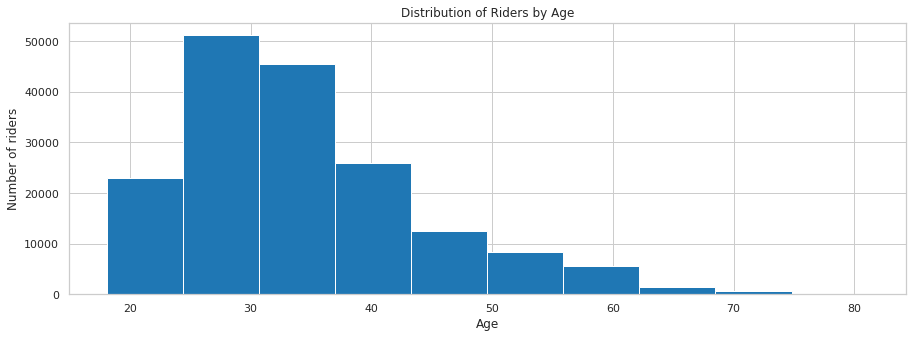

In [36]:
# We plot the age distribution in a histogram
plt.figure(figsize=(15,5))
plt.hist(data=fordgobike, x='age', log=False,)
plt.title('Distribution of Riders by Age')
plt.xlabel('Age')
plt.ylabel('Number of riders'); 

Most of the users are between 25 and 35 years of age. In out plot however, the bins sizes are too large, we plot using smaller bin sizes below.

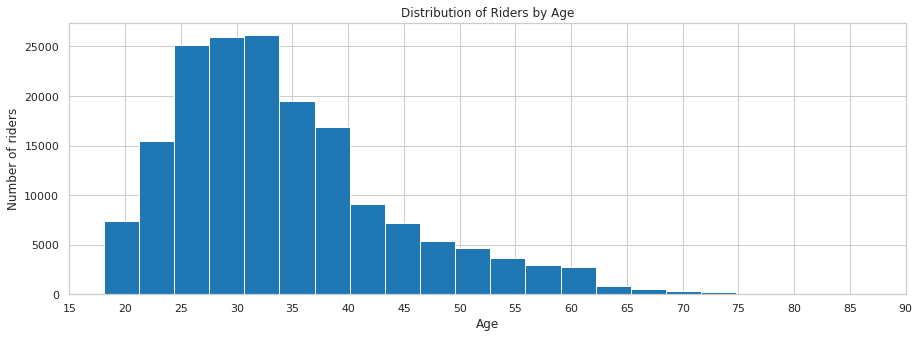

In [37]:
# doubling the number of bins
plt.figure(figsize=(15,5))
plt.hist(data=fordgobike, x='age', log=False, bins=20)
plt.xticks(np.arange(15,95,5))
plt.title('Distribution of Riders by Age')
plt.xlabel('Age')
plt.ylabel('Number of riders');

In [38]:
# what are the statistics for the age variable
fordgobike.age.describe()

count    174067.000000
mean         34.246825
std           9.877848
min          18.084930
25%          27.125475
50%          32.115065
75%          39.115669
max          81.100997
Name: age, dtype: float64

In [39]:
# mean age of the riders
fordgobike.age.mean()

34.24682538691203

We observe that most riders are between the ages of 21 and 40, with the mean at around 34 years of age, while the median at around 32.

##### Bike share for all program subscribers

How is the bike share for all program's subscription?

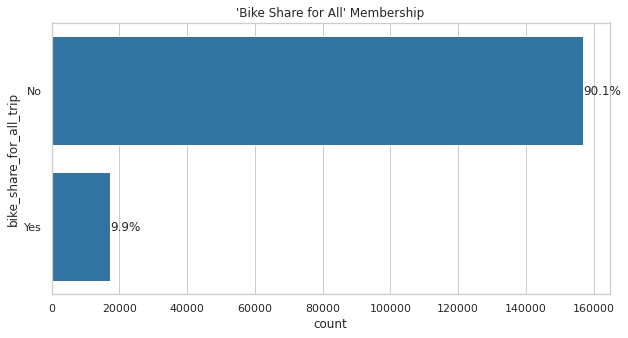

In [40]:
# usage by bike share for all program 
sb.set(style='whitegrid', palette=None, rc={'figure.figsize':(10,5)})
sb.countplot(data=fordgobike, y='bike_share_for_all_trip', color=sb.color_palette()[0])

# annotate the bars
freq_b = fordgobike.bike_share_for_all_trip.value_counts()
total_bike_share = fordgobike.bike_share_for_all_trip.value_counts().sum()

for item in range(freq_b.shape[0]):
    count = freq_b[item]
    string = f'{100*count/total_bike_share:.1f}%'
    plt.text(count+1, item, string, va='center')

plt.title("'Bike Share for All' Membership");

We observe that almost 10% of the trips are by riders in the 'bike share for all' program.

#### Bike usage by day of the week

Are there days when the bikes are mostly used?

To answer that question, we first introduce a day column in our dataset.

In [41]:
# add a day column 
fordgobike['day'] = fordgobike.start_time.dt.day_name()

# format the column as a categorical type with the week starting on monday
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_categories = pd.api.types.CategoricalDtype(ordered = True, categories = days)
fordgobike['day'] = fordgobike.day.astype(day_categories)

fordgobike.iloc[:, -7:].sample(10)

,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_mins,day
4056,Subscriber,1986-01-01,Female,No,33.160647,24,Thursday
28907,Subscriber,1989-01-01,Male,No,30.150766,9,Monday
126764,Subscriber,1985-01-01,Male,No,34.110866,2,Sunday
118642,Subscriber,1982-01-01,Female,No,37.114458,8,Monday
10253,Subscriber,1993-01-01,Male,No,26.157604,24,Wednesday
135154,Subscriber,1992-01-01,Male,No,27.107026,6,Friday
129154,Subscriber,1993-01-01,Male,No,26.109982,6,Sunday
145015,Subscriber,1986-01-01,Male,No,33.102482,7,Thursday
134778,Subscriber,1981-01-01,Male,No,38.105383,3,Friday
6340,Subscriber,1987-01-01,Male,No,32.160658,3,Thursday


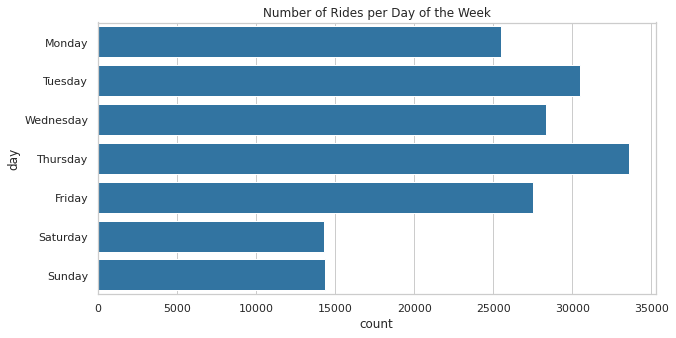

In [42]:
# plot the data on day usage
sb.countplot(data=fordgobike, y='day', color=sb.color_palette()[0])
plt.title('Number of Rides per Day of the Week');

We observe that the saturday and Sunday are the least busy days. Probably, since it's a weekend and many people are not commuting to work on those two days. Thursday is the most popular, followed by tuesday. We however note that this is data for one month, for the month of February, and therefore may vary in other months or years.

We can visualize this trend on a line plot as seen below:

In [43]:
# group the data by the day
day_counts = fordgobike.groupby(['day'])['day'].count()

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


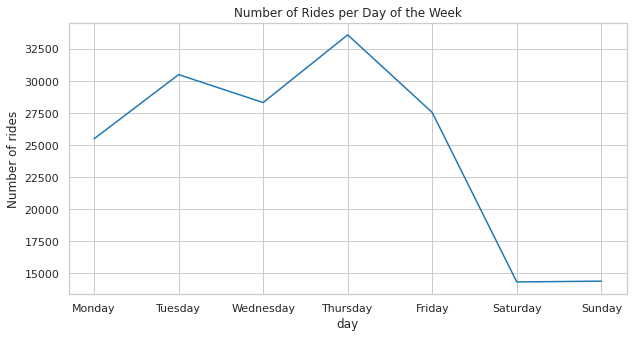

In [44]:
# plot a time series of the number of trips per hour of the day
fig, ax = plt.subplots()
day_counts.plot.line()
ax.set_xticks(np.arange(0,7,1))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rides per Day of the Week')
plt.ylabel('Number of rides');

#### Bike usage by time of day

What is the most popular time of day for the bike use?

In [45]:
# create a column where each trip is categorized by time of day when the tip starts
fordgobike['hour'] = fordgobike.start_time.dt.hour

In [46]:
# group the data by the hour
hour_counts = fordgobike.groupby(['hour'])['hour'].count()


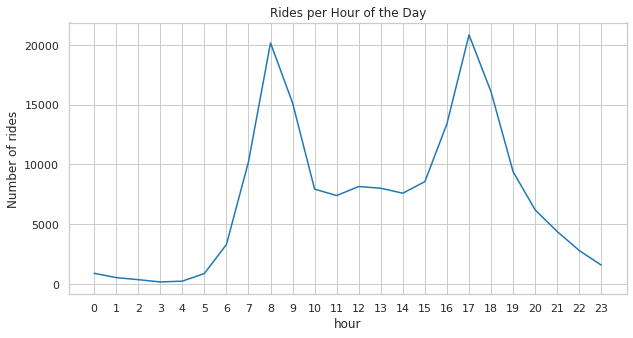

In [47]:
# plot a time series of the number of trips per hour of the day
hour_counts.plot.line()
plt.xticks(np.arange(0,24,1))
plt.title('Rides per Hour of the Day')
plt.ylabel('Number of rides');

The plot reveals a bimodal peak at 8 am and 5 pm. this coincides with the time most people are commuting in the morning and in the evening.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> It was interesting finding out that the peak usage time was at 8am and 5pm. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> It was unusual finding that several 100 year olds rode with the service. This needs to be looked into closely to find out if data was captured correctly or there are indeed several senior citizens riding. Some rides also lasted for a long time, spanning days. This should be investigated.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In this section we find out how various variables described above interact with each other

#### Preliminary bivariate exploration

In [48]:
# inspect colums
list(fordgobike.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip',
 'age',
 'duration_mins',
 'day',
 'hour']

In [49]:
# Classify the variables
numeric_vars = ['age', 'duration_mins','hour']
categorical_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'day', 'hour']

In [50]:
# is there correlation between the numerical variables
fordgobike[['age', 'duration_mins','hour']].corr()

,age,duration_mins,hour
age,1.000000,0.023605,-0.065615
duration_mins,0.023605,1.000000,0.007452
hour,-0.065615,0.007452,1.000000


fordgobike.shape= (174067, 20)
fordgobike_samp.shape= (100, 20)


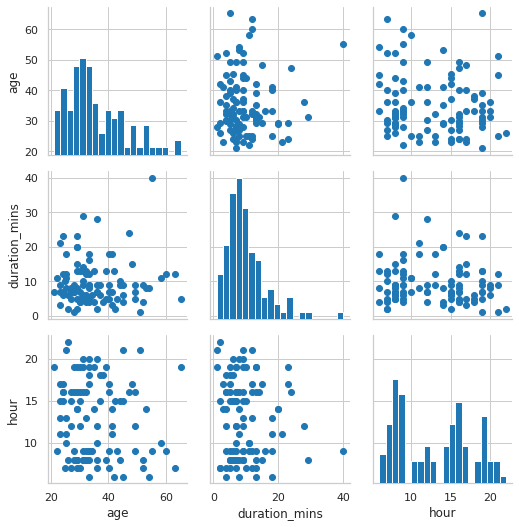

In [51]:
# pair plot  matrix
# plot matrix, i sample the trips so that plots are clearer(less overplotting) and they render faster
print("fordgobike.shape=",fordgobike.shape)
fordgobike_samp = fordgobike.sample(n=100, replace = False)
print("fordgobike_samp.shape=",fordgobike_samp.shape)

g = sb.PairGrid(data = fordgobike_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

None of the plots jumps at us in terms of interesting insights, we try others.

#### Type of user vs duration of a trip

Does the type of user determine how long the trip will be?

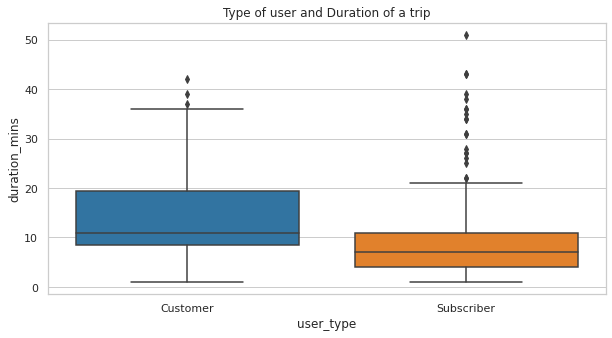

In [52]:
sb.boxplot(data=fordgobike.sample(n=500, replace=False), x='user_type', y='duration_mins')
plt.title('Type of user and Duration of a trip');

It seems that the subsctibers generally take shorter trips, by duration in minutes, than customers. Let's inspect the trip duration mean more closely:

In [53]:
# customer duration mean and subscriber duration mean
fordgobike[fordgobike['user_type']=='Customer'].duration_mins.mean(),\
fordgobike[fordgobike['user_type']=='Subscriber'].duration_mins.mean()

(15.817480402444293, 9.490846667426805)

In [54]:
# customer duration median and subscriber duration median
fordgobike[fordgobike['user_type']=='Customer'].duration_mins.median(), \
fordgobike[fordgobike['user_type']=='Subscriber'].duration_mins.median()

(12.0, 8.0)

In [55]:
f"{fordgobike[fordgobike['user_type']=='Customer'].duration_mins.sum() :,}", \
f"{fordgobike[fordgobike['user_type']=='Subscriber'].duration_mins.sum() :,}"

('256,259', '1,498,282')

We observe that customer's trips last longer, about 15 minutes than Subscribers who take about 9 minutes per trip on average, and a median of 12 and 8 minutes respectively. These figures are higher for the overall data since were are working on a subset of the data for trips between 0 and 100 minutes. However, Subscribers rode for almost 1.5 million minutes ad compared to about 0.26 million minutes by customers

#### Subscription per gender

Is subscription different per gender?

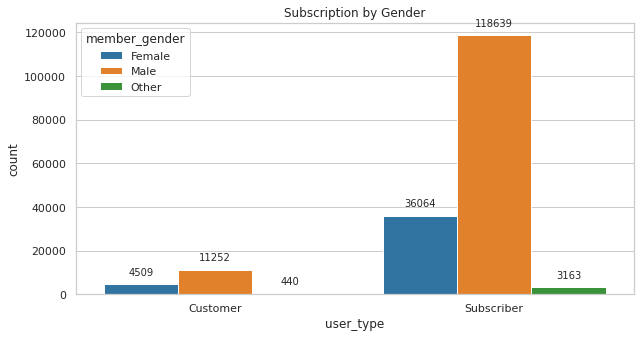

In [56]:
# plotting user type per gender
cplot = sb.countplot(data=fordgobike, hue='member_gender', x='user_type')

# annotate the bars
for p in cplot.patches:
    cplot.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   size=10,
                   xytext = (0, 12), 
                   textcoords = 'offset points'
                  )
plt.title('Subscription by Gender');

Male riders are the significant majority for both Customers and Subscribers alike.

#### Subscription for 'bike share for all' program

Are there riders who are in the 'bikeshare for all' program who are not subscribers?

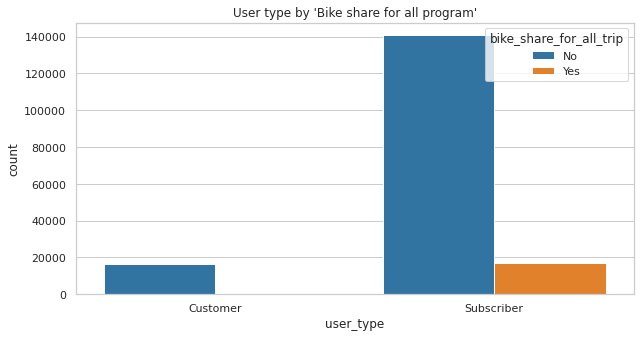

In [57]:
# plotting user type and bike share for all
sb.countplot(data=fordgobike, hue='bike_share_for_all_trip', x='user_type')
plt.title("User type by 'Bike share for all program'");

We observe that all riders in the 'bike share for all' program are subscribers, hence the program must be on subscription basis.

#### Gender distribution vs bike share for all membership

How does gender compare in the bike share for all membership?

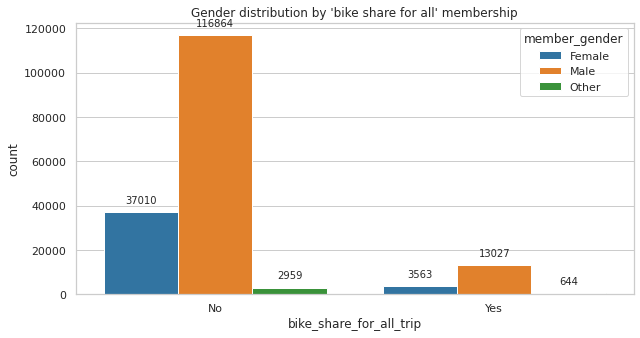

In [58]:
# plotting gender distribution vs bike share for all membership
cplot = sb.countplot(data=fordgobike, x='bike_share_for_all_trip', hue='member_gender')

# annotate the bars
for p in cplot.patches:
    cplot.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   size=10,
                   xytext = (0, 12), 
                   textcoords = 'offset points'
                  )
plt.title("Gender distribution by 'bike share for all' membership");

We observe that a large majority of the 'bike share for all program riders are male, which mirrors the general dataset.

#### Trip duration vs bike share for all program

How does trip duration compare to the bike sahre for all program?

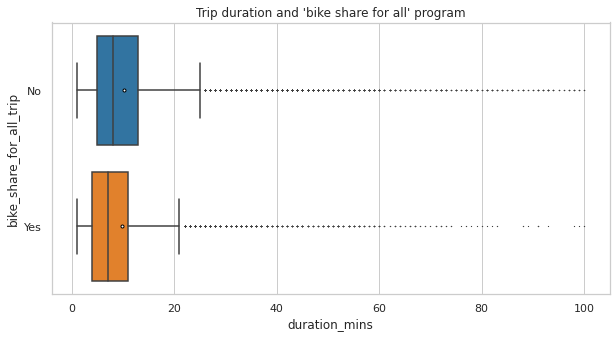

In [59]:
# plotting
sb.boxplot(data=fordgobike, x='duration_mins', y='bike_share_for_all_trip', fliersize=.4, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"3"})

plt.title("Trip duration and 'bike share for all' program");

We observe that the trips in the 'bike share for all' program generally last a shorter time. The program target low income residents, therefore they will likely ride shorter to due to income constraints.

#### Duration of a trip by time of day

Does the duration of a trip vary by time of day?

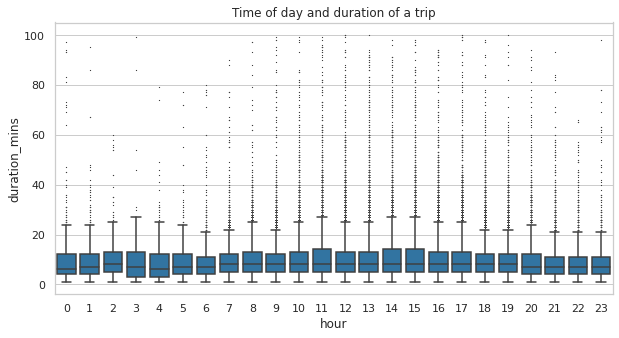

In [60]:
#plotting 
sb.boxplot(data = fordgobike, x='hour', y='duration_mins', color=sb.color_palette()[0], fliersize=.4 )
plt.title('Time of day and duration of a trip');

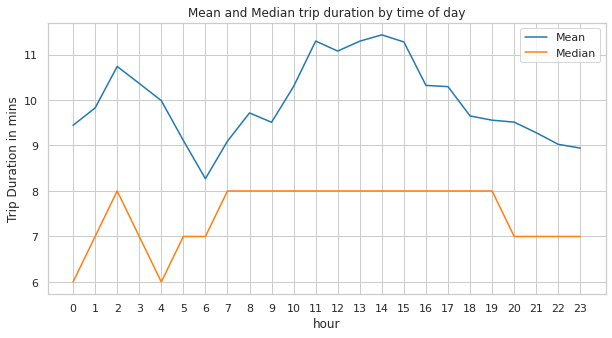

In [61]:
# mean and median trip duration comparison throughout the day
fordgobike.groupby(['hour'])['duration_mins'].mean().plot(label='Mean')
fordgobike.groupby(['hour'])['duration_mins'].median().plot(label='Median')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.legend()
plt.title('Mean and Median trip duration by time of day')
plt.ylabel('Trip Duration in mins');

We observe that although the typical length of a trip throughout the day varies only slightly, longer rides are more common between 9am and 6pm. 

#### Age of rider vs Duration of a trip

How does age of the rider compare to the duration of a trip

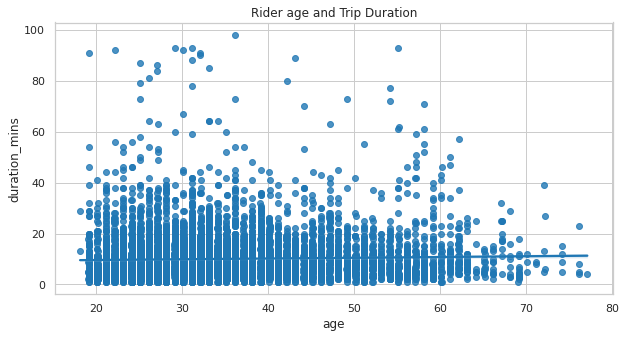

In [62]:
# plotting age vs duration of a trip
sb.regplot(data=fordgobike.sample(n=10000, replace=False), x='age', y='duration_mins', fit_reg=True)
plt.title('Rider age and Trip Duration');

Although the trip duration varies marginally across the various ages, there are more outliers (take longer trips) between 18 and 40 years of age.

#### Gender and trip duration

How do gender compare with the length of a trip?

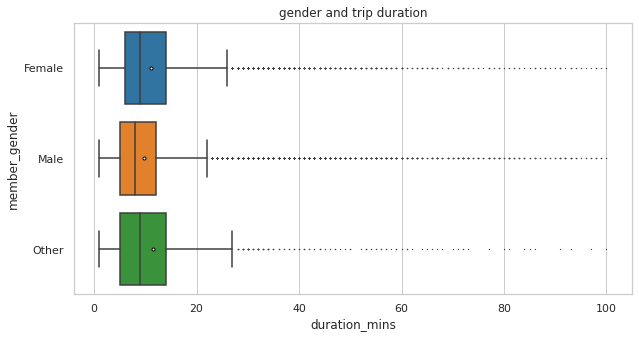

In [63]:
# gender and trip duration in minutes
box = sb.boxplot(data=fordgobike, y='member_gender', x='duration_mins', fliersize=.4, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"3"})
plt.title('gender and trip duration');

In [64]:
medians = fordgobike.groupby('member_gender')['duration_mins'].median()
medians

member_gender
Female    9
Male      8
Other     9
Name: duration_mins, dtype: int64

In [65]:
means = fordgobike.groupby('member_gender')['duration_mins'].mean()
means

member_gender
Female    11.067409
Male       9.731298
Other     11.516792
Name: duration_mins, dtype: float64

In [66]:
totals = fordgobike.groupby('member_gender')['duration_mins'].sum()
totals

member_gender
Female     449038
Male      1264008
Other       41495
Name: duration_mins, dtype: int64

We observe that  the males have shorter trip durations than famales and other genders. Is it that they ride faster or do they generally ride for shorter distances? We recommend a further analysis on that. The males however rode for 1.26 million minutes, females rode for 449K minutes and other genders rode for 41K minutes.

#### Weekends vs Weekdays usage trends

How does is ridership on weekdays vs on weekends?

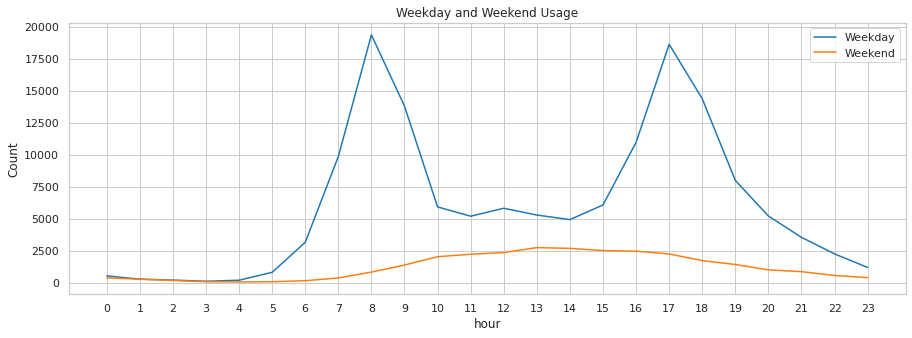

In [67]:
# weekdays
hour_counts_wedy = fordgobike[fordgobike.day.between('Monday','Friday')].groupby(['hour'])['hour'].count()
# weekends
hour_counts_wkd =fordgobike[fordgobike.day.between('Saturday','Sunday')].groupby(['hour'])['hour'].count()

# plotting
fig, ax = plt.subplots(figsize=(15,5))
hour_counts_wedy.plot.line(label='Weekday')
hour_counts_wkd.plot.line(label='Weekend')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Count')
plt.legend()
plt.title('Weekday and Weekend Usage');

The bimodal peaks at 8am and 5pm are not observed on weekends. Instead, a gradual rise is observed form 7am in the morning, peaking between 1pm and 2pm, then a gradual decline.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We found out that male subscribers are the main users of the bikes share service.  We also observed less bike usage on weekends and also less peaks on weekends

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We also found that females generally ride for longer durations than other genders.

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Trip duration vs customer type disaggregated by gender

In the trip duration vs customer type, how does gender vary?

We add the gender dimension to the duration vs user type analysis.

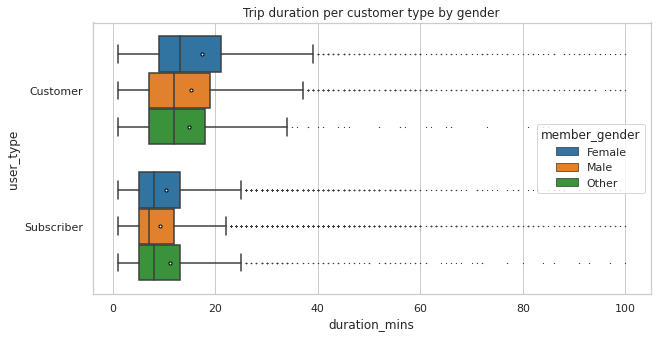

In [68]:
# user type and trip duration in minutes, disaggregated by gender
box = sb.boxplot(data=fordgobike, hue='member_gender', x='duration_mins', y='user_type', fliersize=.4, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"3"})
plt.title('Trip duration per customer type by gender');

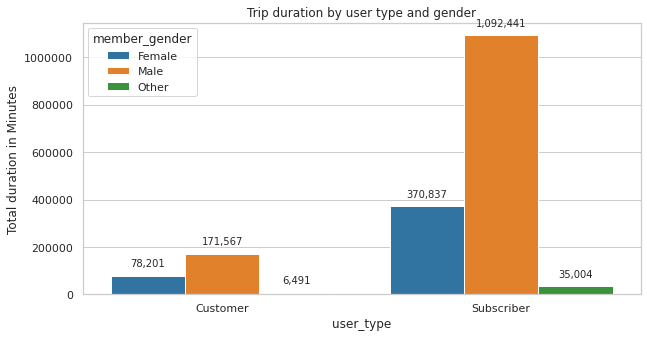

In [69]:
fig, ax = plt.subplots()

sb.barplot(data=fordgobike, hue='member_gender', y='duration_mins', x='user_type', ci=False, estimator=sum)

# add the annotation
# ax.bar_label(ax.containers[-1], fmt=',.2f', label_type='center')

# show the mean
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h)
    text = f'{h:,.0f}'
    ax.annotate(text=text, xy=xy, ha='center', va='center', size=10, xytext = (0, 12), textcoords='offset points')

plt.ticklabel_format(style='plain', axis='y')
plt.title('Trip duration by user type and gender')
plt.ylabel('Total duration in Minutes');

From the two plots above, we observe that female customers have the longest duration of trips, while male subscribers have the shortest duration of trips. However, male subscribers have the highest cumulative duration, at more than 1 million minutes.

#### Average trip duration by 'bike share for all' membership, by gender?

Are there distinct characteristics in trip duration for those 'in bike share for all' members with respect to gender?

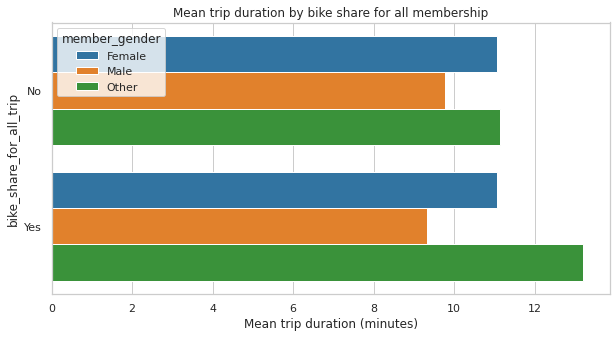

In [70]:
# bikeshare per trip vs duration, disaggregated by gender
bplot = sb.barplot(data=fordgobike, y='bike_share_for_all_trip', x='duration_mins', hue='member_gender', ci=False)
plt.xlabel('Mean trip duration (minutes)')
plt.title('Mean trip duration by bike share for all membership');

The 'other' gender and the male gender who are member of the 'bike share for all' program have the longest and the shortest duration of trips on average respectively.

#### Trip Duration on weekdays vs weekends

Does trip duration vary on weekends vs weekdays?

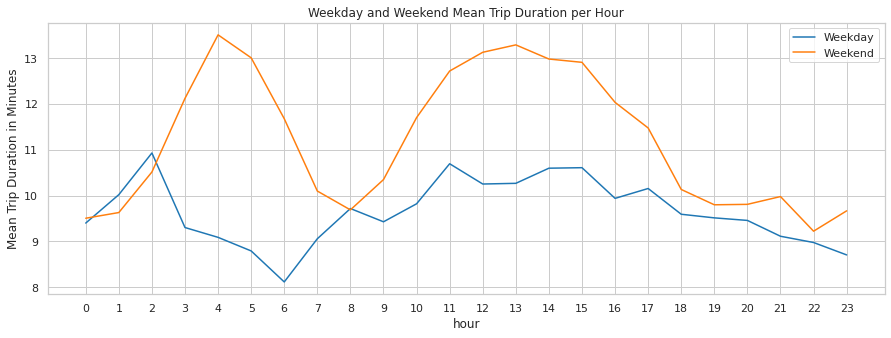

In [71]:
# weekdays
hour_means_wedy = fordgobike[fordgobike.day.between('Monday','Friday')].groupby(['hour'])['duration_mins'].mean()
# weekends
hour_means_wkd =fordgobike[fordgobike.day.between('Saturday','Sunday')].groupby(['hour'])['duration_mins'].mean()

# plotting
fig, ax = plt.subplots(figsize=(15,5))
hour_means_wedy.plot.line(label='Weekday')
hour_means_wkd.plot.line(label='Weekend')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Count')
plt.legend()
plt.title('Weekday and Weekend Mean Trip Duration per Hour')
plt.ylabel('Mean Trip Duration in Minutes');

We observe that trips last longer on weekends than on weekdays. This may suggest that people ride on weekends for leisure and weekdays to commute, or they could just be in less of a hurry on weekends. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section we saw the gender aspect in trip duration and user type. More males were subscribers and made up the biggest total duration by cumulative minutes.

### Were there any interesting or surprising interactions between features?

> Despite the males making up the majority of the subscribers and the cumulative duation, females and other genders rode for longer on average. We also observed that people rode longer on weekends than on weekdays.

<a id='conclusion'></a>
## Conclusions

The time dimension, that is trip duration and when the trips occurred was the most likely variable for determining the likelihood or occurence of a trip. Additionally, riders' characteristics in the context of gender and subscription were also an important variable.
<ul>
<li>Most of the trips lasted for between 0 and 100 minutes. The majority of the trips (75%), lasted between 1 minute and 13 minutes but there is a long tail from 13 minutes onwards, up to 1409 minutes which was the longest trip.
<li>Saturdays and Sundays were the least busy days, likely because, on weekends, fewer people were commuting to work. Thursdays were the most popular, followed by Tuesdays</li>
<li>There was a bimodal peak at 8 am and 5 pm, which coincides with the time most people are commuting in the morning and in the evening. However, the bimodal peaks at 8 am and 5 pm were not observed on weekends. Instead, a gradual rise is observed from 7 am, peaking between 1 pm and 2 pm, then a gradual decline</li>
<li>Trips lasted longer on weekends than on weekdays. This may suggest that people rode on weekends for leisure and on weekdays to commute, or they could just have been in less of a hurry on weekends</li>
<li>A majority of the riders were subscribers (90%), with male users at more than 74%, females at about 23% and other genders at about 2%. 
<li>Males had shorter trip durations than females and other genders.
<li>The males however rode for a cumulative 1.26 million minutes, females for 449K minutes and other genders rode for 41K minutes. 
<li>Female customers had the longest duration of trips, while male subscribers had the shortest duration of trips.